In [97]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import joblib

In [98]:
columns_to_oh_encode = ["CHARSET"]
columns_to_target_encode = ["WHOIS_COUNTRY"]

In [99]:
pipeline = make_pipeline(
    ce.OneHotEncoder(cols=columns_to_oh_encode),
    ce.TargetEncoder(cols=columns_to_target_encode),
    DecisionTreeClassifier(max_depth=4),
)

In [100]:
X_train = pd.read_csv("../data/interim/X_train.csv")
X_test = pd.read_csv("../data/interim/X_Test.csv")
y_train = pd.read_csv("../data/interim/y_train.csv")
y_test = pd.read_csv("../data/interim/y_test.csv")

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1419, 14)
(355, 14)
(1419, 1)
(355, 1)


In [102]:
y_train.head()

,Type
0,0
1,0
2,0
3,0
4,0


In [103]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['CHARSET'])),
                ('targetencoder', TargetEncoder(cols=['WHOIS_COUNTRY'])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4))])

In [104]:
y_pred = pipeline.predict(X_test)

In [105]:
f1_score(y_true=y_test, y_pred=y_pred)

0.7317073170731706

In [106]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[303,  10],
       [ 12,  30]])

In [107]:
pipeline.named_steps["decisiontreeclassifier"].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [108]:
features = pipeline.named_steps["decisiontreeclassifier"].feature_importances_

In [109]:
feat_imp = dict(zip(X_train.columns, features))

In [110]:
dict(sorted(feat_imp.items(), key=lambda item: item[1], reverse=True))

{'REMOTE_IPS': 0.6519432090602852,
 'URL_LENGTH': 0.11692971865800322,
 'SOURCE_APP_PACKETS': 0.11463458328339313,
 'SOURCE_APP_BYTES': 0.07704171787612571,
 'DNS_QUERY_TIMES': 0.013161109412103193,
 'APP_PACKETS': 0.010342105969751622,
 'REMOTE_APP_PACKETS': 0.005398053630504688,
 'NUMBER_SPECIAL_CHARACTERS': 0.0,
 'CHARSET': 0.0,
 'WHOIS_COUNTRY': 0.0,
 'TCP_CONVERSATION_EXCHANGE': 0.0,
 'DIST_REMOTE_TCP_PORT': 0.0,
 'APP_BYTES': 0.0,
 'REMOTE_APP_BYTES': 0.0}

[Text(0.5441176470588235, 0.9, 'x[6] <= 0.226\ngini = 0.214\nsamples = 1419\nvalue = [1246, 173]\nclass = 0'),
 Text(0.3235294117647059, 0.7, 'x[6] <= 0.125\ngini = 0.142\nsamples = 1348\nvalue = [1244, 104]\nclass = 0'),
 Text(0.11764705882352941, 0.5, 'x[13] <= 62.0\ngini = 0.082\nsamples = 1078\nvalue = [1032, 46]\nclass = 0'),
 Text(0.058823529411764705, 0.3, 'gini = 0.0\nsamples = 413\nvalue = [413, 0]\nclass = 0'),
 Text(0.17647058823529413, 0.3, 'x[10] <= 111.0\ngini = 0.129\nsamples = 665\nvalue = [619, 46]\nclass = 0'),
 Text(0.11764705882352941, 0.1, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]\nclass = 1'),
 Text(0.23529411764705882, 0.1, 'gini = 0.104\nsamples = 653\nvalue = [617, 36]\nclass = 0'),
 Text(0.5294117647058824, 0.5, 'x[8] <= 1.5\ngini = 0.337\nsamples = 270\nvalue = [212, 58]\nclass = 0'),
 Text(0.4117647058823529, 0.3, 'x[0] <= 43.5\ngini = 0.481\nsamples = 139\nvalue = [83, 56]\nclass = 0'),
 Text(0.35294117647058826, 0.1, 'gini = 0.438\nsamples = 71\nvalue =

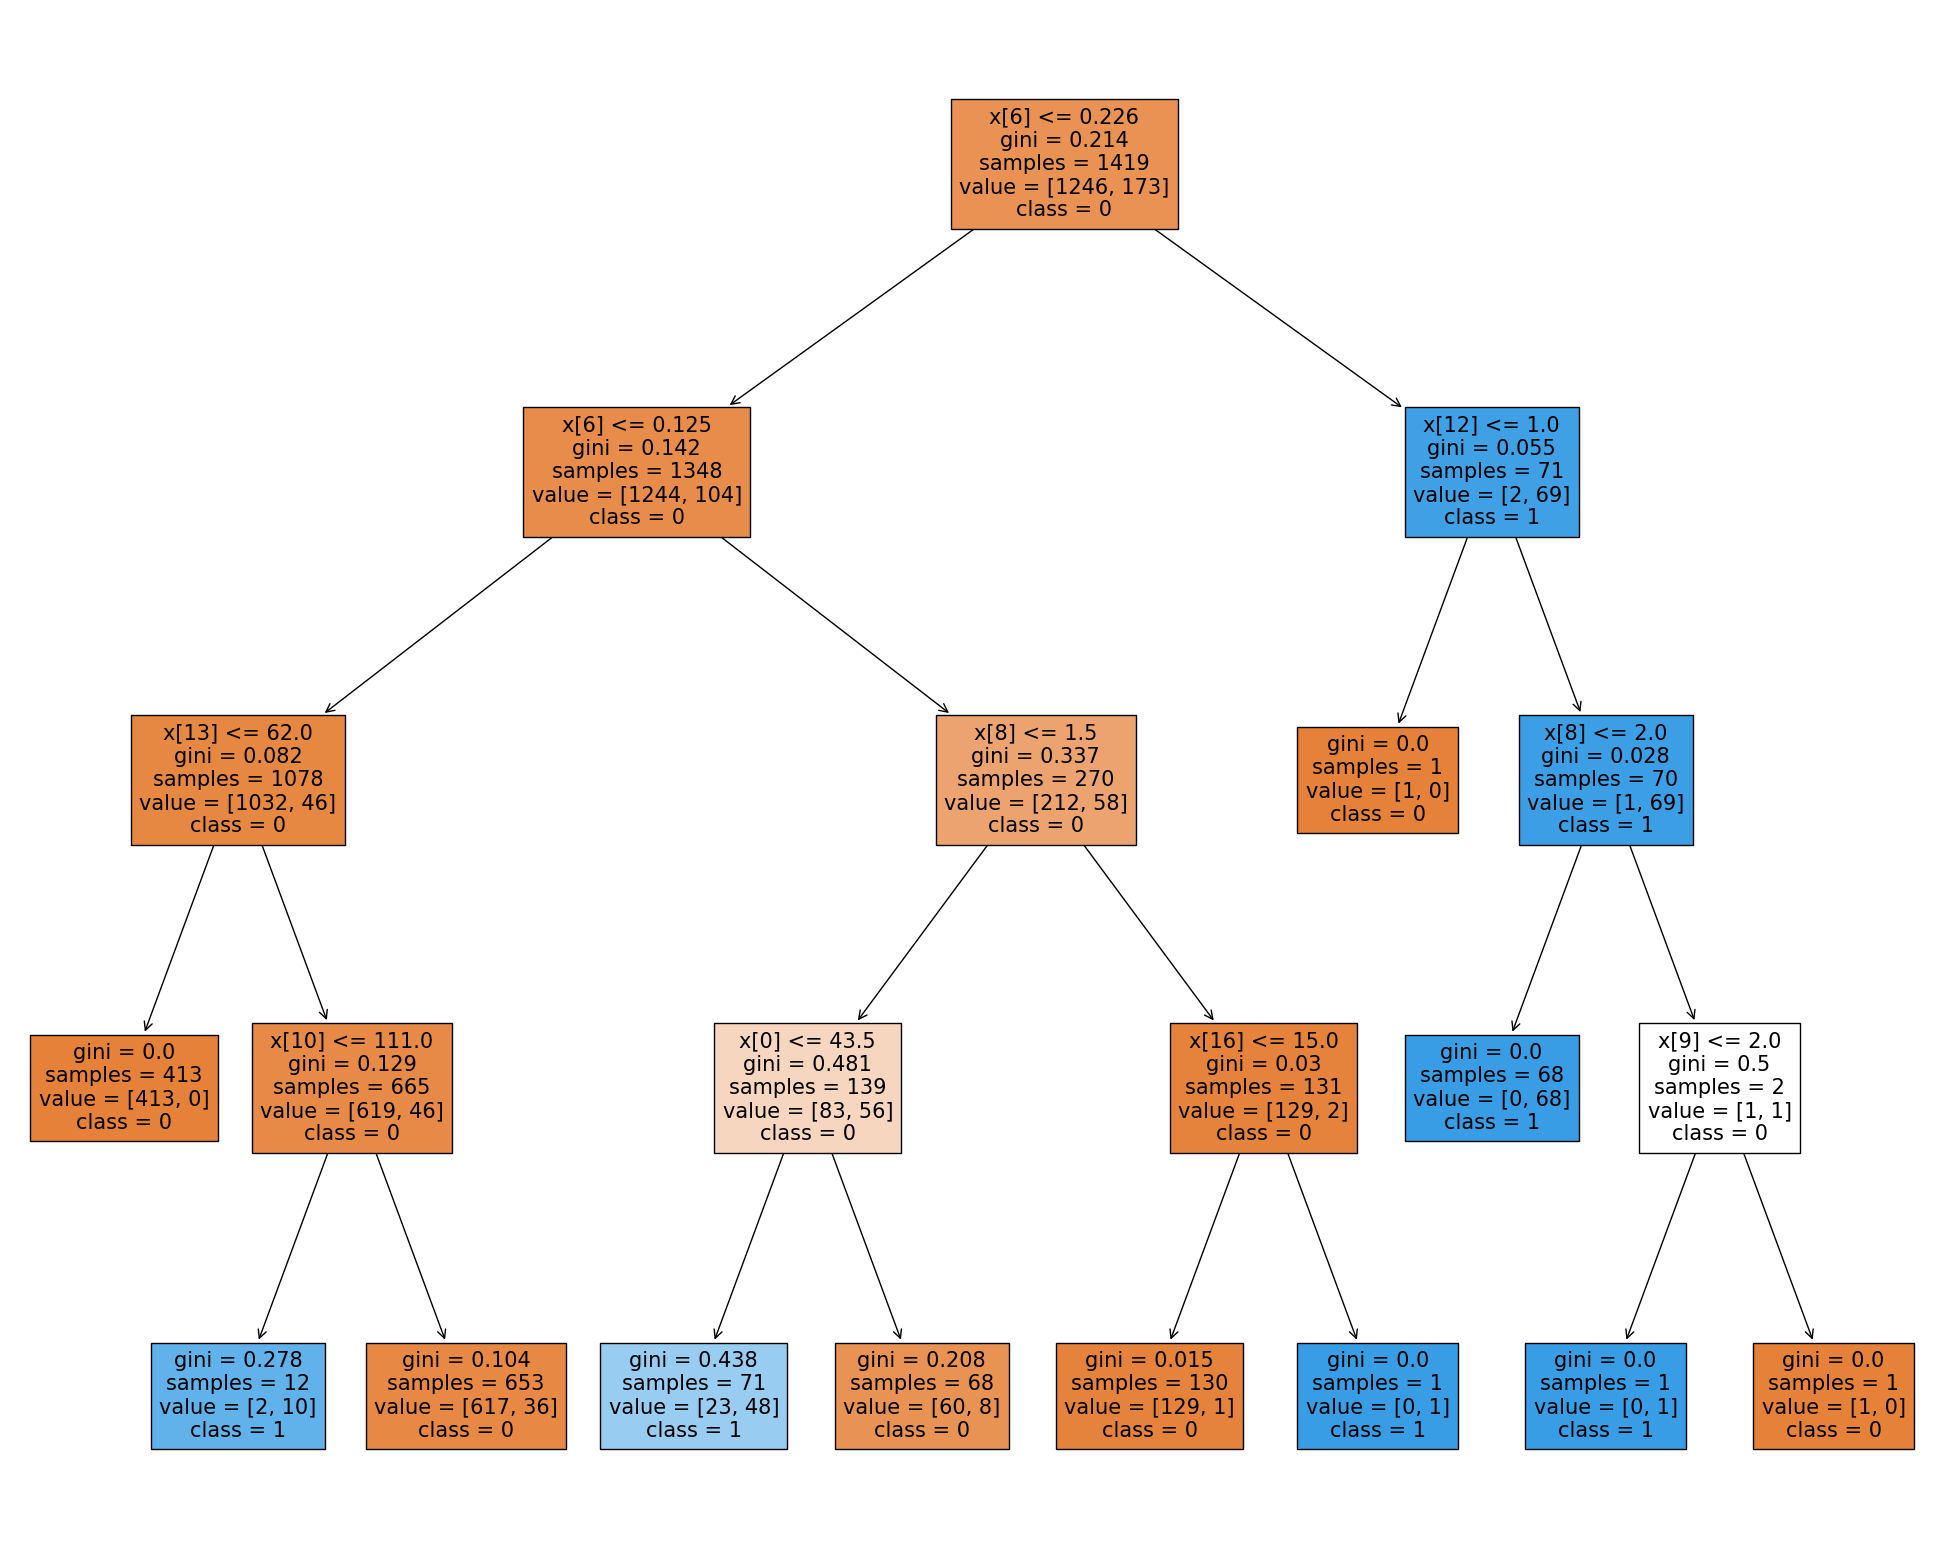

In [111]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(
    pipeline.named_steps["decisiontreeclassifier"], class_names=["0", "1"], filled=True
)

export model

In [112]:
joblib.dump(pipeline, "../models/Decisiontree.pkl")

['../models/Decisiontree.pkl']

In [113]:
joblib.load("../models/Decisiontree.pkl").predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [114]:
y_train_pred = pipeline.predict(X_train)

In [115]:
f1_score(y_true=y_train, y_pred=y_train_pred)

0.7852760736196319